In [53]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests
import sys

sys.path.insert(1,'C:/Users/chris/CU-Repositories/')

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime


In [54]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [55]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [56]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [57]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [58]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [69]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 37 of Set 73 | santiago de cao
Processing Record 38 of Set 73 | avarua
Processing Record 39 of Set 73 | kapaa
Processing Record 40 of Set 73 | ahipara
Processing Record 41 of Set 73 | rikitea
Processing Record 42 of Set 73 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 73 | lata
Processing Record 44 of Set 73 | vestmanna
Processing Record 45 of Set 73 | jinxi
Processing Record 46 of Set 73 | marzuq
Processing Record 47 of Set 73 | jamestown
Processing Record 48 of Set 73 | yellowknife
Processing Record 49 of Set 73 | yar-sale
Processing Record 50 of Set 73 | ust-kamchatsk
City not found. Skipping...
Processing Record 51 of Set 73 | kirakira
Processing Record 52 of Set 73 | albany
Processing Record 53 of Set 73 | zhengjiatun
Processing Record 54 of Set 73 | kodiak
Processing Record 55 of Set 73 | sulangan
Processing Record 56 of Set 73 | obera
Processing Record 57 of Set 73 | punta arenas
Processing Record 58 of Set 73 | mataura
Processing Record 

Processing Record 40 of Set 76 | saint george
Processing Record 41 of Set 76 | mount gambier
Processing Record 42 of Set 76 | high level
Processing Record 43 of Set 76 | amderma
City not found. Skipping...
Processing Record 44 of Set 76 | bandarbeyla
Processing Record 45 of Set 76 | sorong
Processing Record 46 of Set 76 | avera
Processing Record 47 of Set 76 | loubomo
Processing Record 48 of Set 76 | tuktoyaktuk
Processing Record 49 of Set 76 | alofi
Processing Record 50 of Set 76 | sakakah
Processing Record 1 of Set 77 | bayji
Processing Record 2 of Set 77 | martapura
Processing Record 3 of Set 77 | nantucket
Processing Record 4 of Set 77 | coquimbo
Processing Record 5 of Set 77 | kattivakkam
Processing Record 6 of Set 77 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 77 | mezinovskiy
Processing Record 8 of Set 77 | mae ramat
Processing Record 9 of Set 77 | shakawe
Processing Record 10 of Set 77 | broome
Processing Record 11 of Set 77 | tigil
Processing Record 

Processing Record 27 of Set 80 | carauari
Processing Record 28 of Set 80 | sur
Processing Record 29 of Set 80 | pital
Processing Record 30 of Set 80 | plainview
Processing Record 31 of Set 80 | port hope
Processing Record 32 of Set 80 | berezovyy
Processing Record 33 of Set 80 | ostrovnoy
Processing Record 34 of Set 80 | raga
Processing Record 35 of Set 80 | bubaque
Processing Record 36 of Set 80 | lixourion
Processing Record 37 of Set 80 | ardahan
Processing Record 38 of Set 80 | porto belo
Processing Record 39 of Set 80 | leningradskiy
Processing Record 40 of Set 80 | zhigansk
Processing Record 41 of Set 80 | ziyang
Processing Record 42 of Set 80 | kalmunai
Processing Record 43 of Set 80 | matto
City not found. Skipping...
Processing Record 44 of Set 80 | sao joao da barra
Processing Record 45 of Set 80 | great bend
Processing Record 46 of Set 80 | plettenberg bay
Processing Record 47 of Set 80 | mafinga
Processing Record 48 of Set 80 | kavaratti
Processing Record 49 of Set 80 | samb

Processing Record 13 of Set 84 | saint-pierre
Processing Record 14 of Set 84 | vicosa do ceara
Processing Record 15 of Set 84 | minas
Processing Record 16 of Set 84 | porto novo
Processing Record 17 of Set 84 | luanda
Processing Record 18 of Set 84 | severnoye
Processing Record 19 of Set 84 | ormara
Processing Record 20 of Set 84 | leshukonskoye
Processing Record 21 of Set 84 | kjollefjord
Processing Record 22 of Set 84 | matagami
Processing Record 23 of Set 84 | melong
Processing Record 24 of Set 84 | sukumo
Processing Record 25 of Set 84 | ouallam
Processing Record 26 of Set 84 | qabis
City not found. Skipping...
Processing Record 27 of Set 84 | bukama
Processing Record 28 of Set 84 | hay river
Processing Record 29 of Set 84 | saint-augustin
Processing Record 30 of Set 84 | faya
Processing Record 31 of Set 84 | kindu
Processing Record 32 of Set 84 | anchorage
Processing Record 33 of Set 84 | bambanglipuro
Processing Record 34 of Set 84 | chifeng
Processing Record 35 of Set 84 | tambo

In [70]:
len(city_data)

2340

In [71]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santiago De Cao,-7.9589,-79.2392,73.40,83,40,9.22,PE,2021-03-21 19:51:39
1,Avarua,-21.2078,-159.7750,78.80,89,75,8.05,CK,2021-03-21 19:51:39
2,Kapaa,22.0752,-159.3190,73.40,64,20,20.71,US,2021-03-21 19:51:39
3,Ahipara,-35.1667,173.1667,60.33,75,0,4.68,NZ,2021-03-21 19:51:40
4,Rikitea,-23.1203,-134.9692,80.13,71,0,7.54,PF,2021-03-21 19:51:40
5,Lata,40.1629,-8.3327,54.00,70,0,10.00,PT,2021-03-21 19:51:40
6,Vestmanna,62.1564,-7.1664,44.60,100,75,14.97,FO,2021-03-21 19:51:40
7,Jinxi,30.4323,116.2922,45.27,70,99,2.55,CN,2021-03-21 19:51:41
8,Marzuq,14.4000,46.4667,63.55,36,0,5.55,YE,2021-03-21 19:51:41
9,Jamestown,42.0970,-79.2353,59.00,13,1,6.73,US,2021-03-21 19:48:28


In [77]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [81]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santiago De Cao,PE,2021-03-21 19:51:39,-7.9589,-79.2392,73.40,83,40,9.22
1,Avarua,CK,2021-03-21 19:51:39,-21.2078,-159.7750,78.80,89,75,8.05
2,Kapaa,US,2021-03-21 19:51:39,22.0752,-159.3190,73.40,64,20,20.71
3,Ahipara,NZ,2021-03-21 19:51:40,-35.1667,173.1667,60.33,75,0,4.68
4,Rikitea,PF,2021-03-21 19:51:40,-23.1203,-134.9692,80.13,71,0,7.54
...,...,...,...,...,...,...,...,...,...
2335,Buraydah,SA,2021-03-21 19:53:09,26.3260,43.9750,75.20,35,0,2.30
2336,Lerwick,GB,2021-03-21 19:53:46,60.1545,-1.1494,44.60,93,75,20.71
2337,Olafsvik,IS,2021-03-21 19:53:46,64.8945,-23.7142,43.12,91,100,33.20
2338,Buckeye,US,2021-03-21 19:48:58,33.3703,-112.5838,78.01,12,0,5.01


In [131]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [132]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

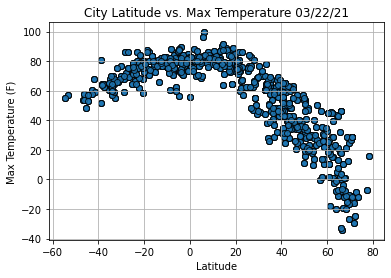

In [133]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

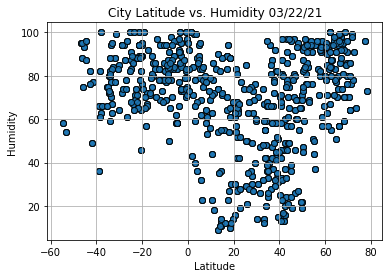

In [134]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

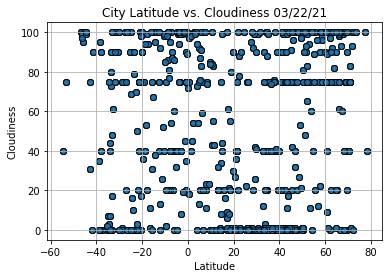

In [135]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

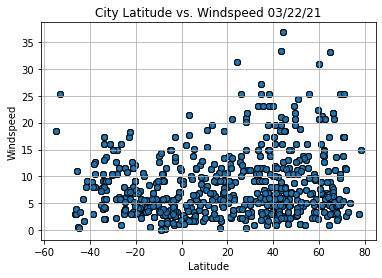

In [136]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [137]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [138]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-03-21 19:51:42
Lat                       42.6001
Lng                      -73.9662
Max Temp                    62.01
Humidity                       20
Cloudiness                     20
Wind Speed                   3.44
Name: 13, dtype: object

In [139]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kapaa,US,2021-03-21 19:51:39,22.0752,-159.3190,73.40,64,20,20.71
5,Lata,PT,2021-03-21 19:51:40,40.1629,-8.3327,54.00,70,0,10.00
6,Vestmanna,FO,2021-03-21 19:51:40,62.1564,-7.1664,44.60,100,75,14.97
7,Jinxi,CN,2021-03-21 19:51:41,30.4323,116.2922,45.27,70,99,2.55
8,Marzuq,YE,2021-03-21 19:51:41,14.4000,46.4667,63.55,36,0,5.55
...,...,...,...,...,...,...,...,...,...
2335,Buraydah,SA,2021-03-21 19:53:09,26.3260,43.9750,75.20,35,0,2.30
2336,Lerwick,GB,2021-03-21 19:53:46,60.1545,-1.1494,44.60,93,75,20.71
2337,Olafsvik,IS,2021-03-21 19:53:46,64.8945,-23.7142,43.12,91,100,33.20
2338,Buckeye,US,2021-03-21 19:48:58,33.3703,-112.5838,78.01,12,0,5.01


In [140]:
city_data_df.loc[(city_data_df["Lat"] < 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santiago De Cao,PE,2021-03-21 19:51:39,-7.9589,-79.2392,73.40,83,40,9.22
1,Avarua,CK,2021-03-21 19:51:39,-21.2078,-159.7750,78.80,89,75,8.05
3,Ahipara,NZ,2021-03-21 19:51:40,-35.1667,173.1667,60.33,75,0,4.68
4,Rikitea,PF,2021-03-21 19:51:40,-23.1203,-134.9692,80.13,71,0,7.54
12,Kirakira,SB,2021-03-21 19:51:42,-10.4544,161.9205,78.60,86,98,4.61
...,...,...,...,...,...,...,...,...,...
2302,Corrente,BR,2021-03-21 19:53:39,-3.7367,-43.3394,78.71,91,100,2.93
2303,Benguela,AO,2021-03-21 19:53:39,-12.5763,13.4055,79.88,78,100,4.43
2309,Carutapera,BR,2021-03-21 19:53:41,-1.1950,-46.0200,81.45,79,45,7.14
2324,Ampanihy,MG,2021-03-21 19:53:43,-24.7000,44.7500,76.32,68,0,3.83


In [141]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

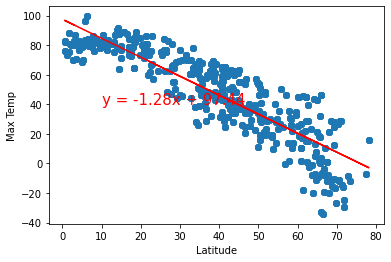

In [142]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

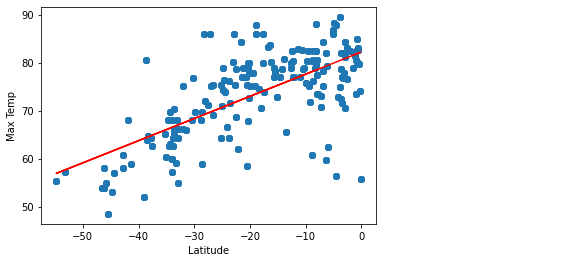

In [143]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

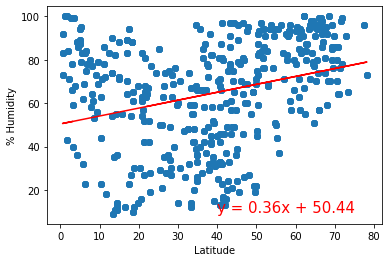

In [145]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

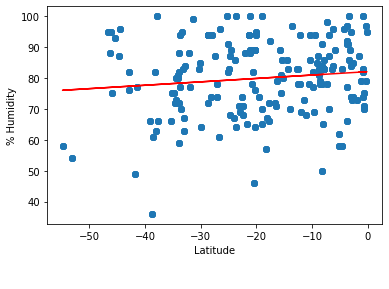

In [147]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

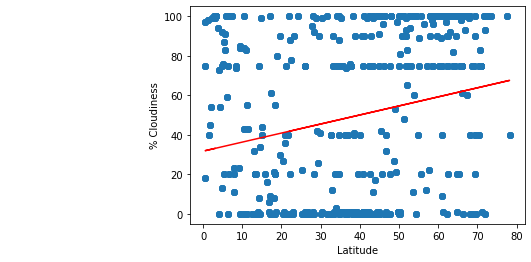

In [130]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

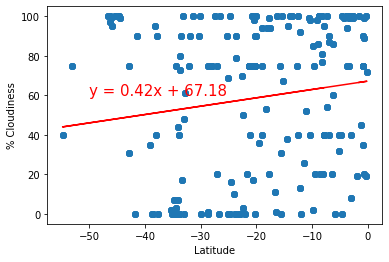

In [152]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

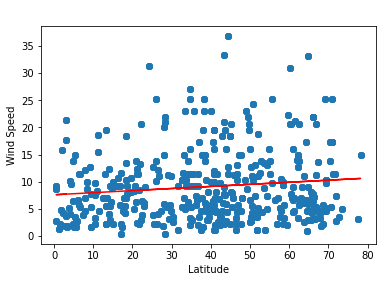

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,40))

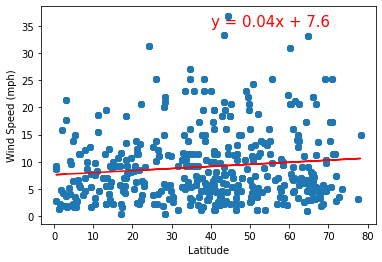

In [155]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,35))

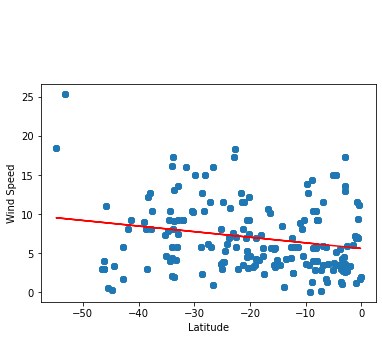

In [157]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))